In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Entity:
    def __init__(self, numExist):
        self.numExist = numExist
        self.history = []
    def mate(self, otherEntity: "Entity"):
        return
    def record(self):
        self.history.append(self.numExist)
    def __repr__(self):
        return f"{self.__class__.__name__}({self.numExist})"

class MaleFast(Entity):
    def __init__(self, numExist):
        super().__init__(numExist)
        
    def mate(self, otherEntity):
        if isinstance(otherEntity, FemaleHardToGet):
            self.numExist += 0
        elif isinstance(otherEntity, FemaleFast):
            self.numExist += 5

class MaleFaithful(Entity):
    def __init__(self, numExist):
        super().__init__(numExist)
        
    def mate(self, otherEntity):
        if isinstance(otherEntity, FemaleHardToGet):
            self.numExist += 10
        elif isinstance(otherEntity, FemaleFast):
            self.numExist += 5
        

class FemaleFast(Entity):
    def __init__(self, numExist):
        super().__init__(numExist)
        
    def mate(self, otherEntity):
        if isinstance(otherEntity, MaleFaithful):
            self.numExist += 10
        elif isinstance(otherEntity, MaleFast):
            self.numExist += -10

class FemaleHardToGet(Entity):
    def __init__(self, numExist):
        super().__init__(numExist)
        
    def mate(self, otherEntity):
        if isinstance(otherEntity, MaleFaithful):
            self.numExist += 10
        elif isinstance(otherEntity, MaleFast):
            self.numExist += 0
        

In [15]:
def run_simulation(n_iter, male_options, female_options, plot_output=True):
	all_options = [*male_options, *female_options]
	for _ in range(n_iter):
		male = np.random.choice(male_options)
		female = np.random.choice(female_options)
		
		#  they accept each other
		male.mate(female)
		female.mate(male)

		# record history
		for option in all_options:
			option.record()
	
	if plot_output:
		xs = list(range(len(all_options[0].history)))
		for option in all_options:
			plt.plot(xs, option.history, label=option.__class__.__name__)
		plt.legend()
		plt.show()

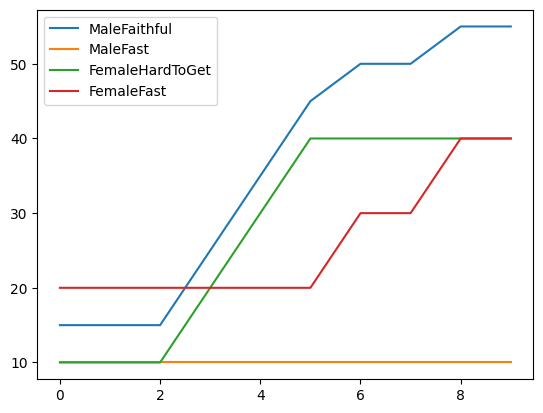

In [19]:
males = [MaleFaithful(10), MaleFast(10)]
females = [FemaleHardToGet(10), FemaleFast(10)]
run_simulation(n_iter=10, male_options=males, female_options=females)

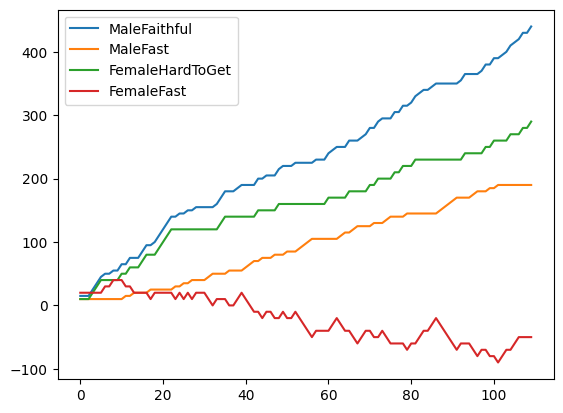

In [20]:
run_simulation(n_iter=100, male_options=males, female_options=females)

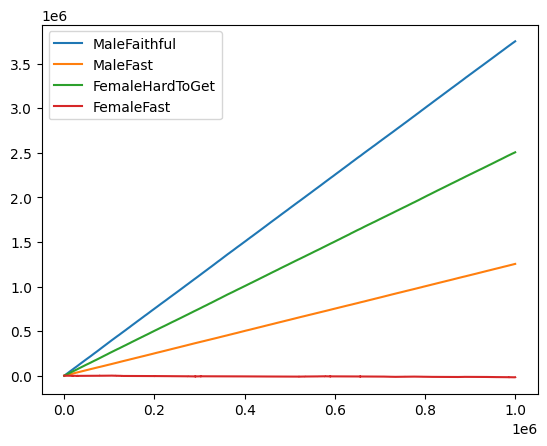

In [21]:
run_simulation(n_iter=1_000_000, male_options=males, female_options=females)

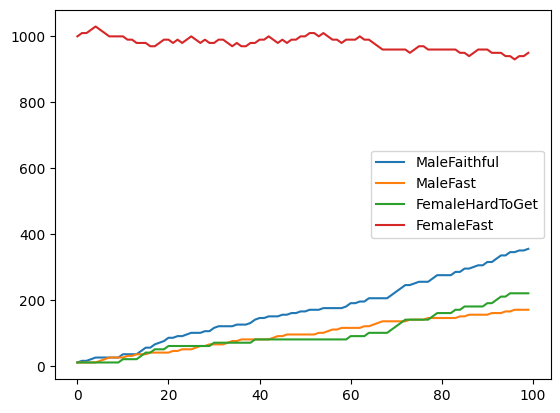

In [23]:
# overwhelming fast females
males = [MaleFaithful(10), MaleFast(10)]
females = [FemaleHardToGet(10), FemaleFast(1_000)]
run_simulation(n_iter=100, male_options=males, female_options=females)

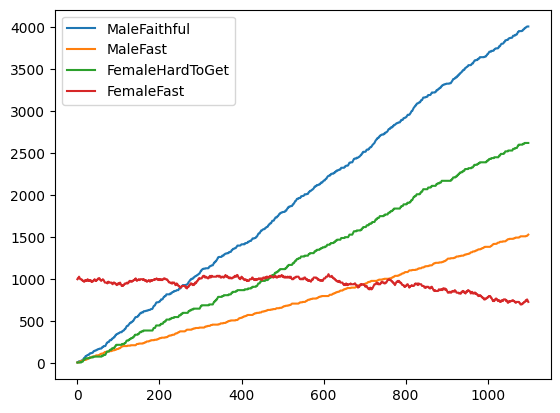

In [24]:
run_simulation(n_iter=1_000, male_options=males, female_options=females)

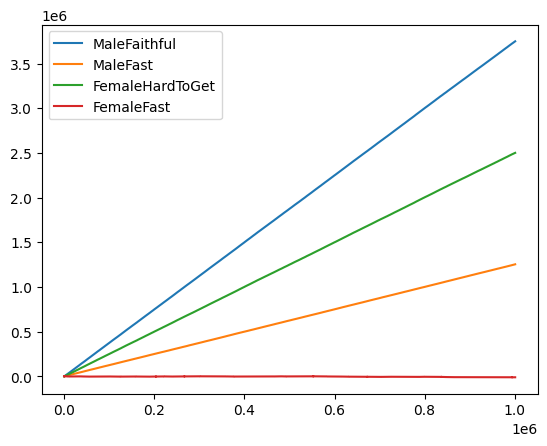

In [25]:
run_simulation(n_iter=1_000_000, male_options=males, female_options=females)

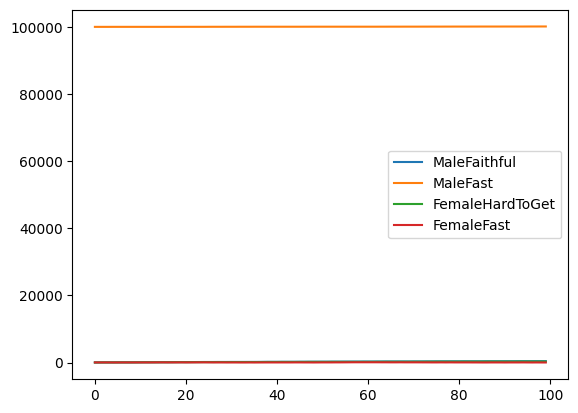

In [28]:
# overwhelming fast males
males = [MaleFaithful(10), MaleFast(100_000)]
females = [FemaleHardToGet(10), FemaleFast(10)]
run_simulation(n_iter=100, male_options=males, female_options=females)

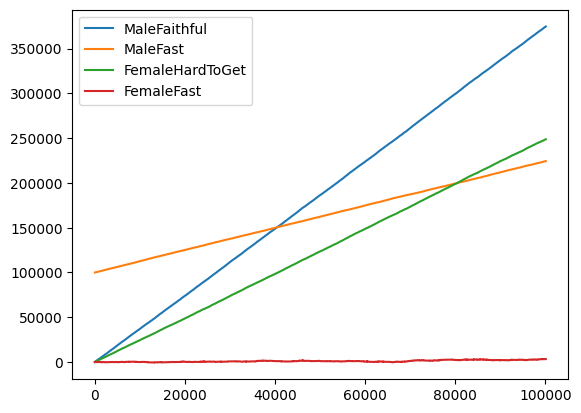

In [29]:
run_simulation(n_iter=100_000, male_options=males, female_options=females)